***
#### About this document
_This is the assignment for the UCL CASA module Data Science for Spatial Systems (CASA0006) <br>This is a self contained Jupyter notebook with structure introduction, discussion and embedded code and bibliography._
<br>
**Code is hosted [here](https://github.com/Huixin-coder/DSSS_Assignment_Submission)**<br>
**Data is available [here](https://github.com/Huixin-coder/DSSS_Assignment_Submission)**
***

# Which factors have a more significant impact on income inequality?
<p style="color:DimGray; text-align:left; font-size:20px"><i> 
<a id="ID_title"></a>

_This paper uses the GapMinder- Income Inequality data for years 2006-2016 by countries in Kaggle, and mainly analyze the data in 2015.
<br>Also thanks to the Gapminder Foundation (a non-profit venture registered in Stockholm, Sweden)._

***

<a id="ID_intr"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Questions](#ID_reaserch) |  [4.0 Methodology](#ID_methodology) | [5.0 Data](#ID_data)  | [6.0 Results and Discussion](#ID_results) | [7.0 Conclusion](#ID_conclude) | [Bibliography](#ID_biblio) | [Appendix](#ID_append) |

## 1.0 | Introduction

As the economy developed rapidly all over the world in recent years, the big problem of income inequality becomes more significant in many countries. To measure and present the income inequality (or wealth inequality), Gini coefficient was developed by the Italian statistician and sociologist Corrado Gini(Gini, 1936), which is commonly used in the measurement of inequality now. Researchers are exploring factors which have impact on the Gini coefficient.

According to the datasets on Kaggle, the Gapminder Foundation provide four factors that may have impacts on the Gini coefficient. They are Income: GDP per capita, constant PPP dollars; Investments (% of GDP); Tax revenue (% of GDP) and a pollical metric named EIU Democracy Index. 

The main purpose of this paper is to focuse on the analysis of income inequality measured by the Gini Index and its association with the four economic factors above.


### 1.1 | Requirements to run the analysis

There is an overview of all the packages used to run the analysis in this paper , with short documentation to explain their roles.

In [1]:
#Data processing library
import pandas as pd
import numpy as np

#Drawing Library
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import seaborn as sns

#Linear regression Model
from sklearn import linear_model

#Lasso Model
from sklearn.linear_model import LinearRegression

#Normalized library
from sklearn.preprocessing import minmax_scale
from math import sqrt

#The library function for cutting the data set, linear regression
from sklearn.model_selection import train_test_split

#Calculate the multivariate linear model directly used at vif and compare; the related libraries cited
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import time
start_time = time.time()

<a id="ID_lit"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Questions](#ID_questions) | [4.0 Methodology](#ID_methodology) | [5.0 Data](#ID_data) | [6.0 Results and Discussion](#ID_results) | [7.0 Conclusion](#ID_conclude) | [Bibliography](#ID_biblio) | [Appendix](#ID_append) |

## 2.0 | Literature Review

A Gini coefficient of zero expresses perfect equality, where all values are the same (for example, where everyone has the same income). A Gini coefficient of one (or 100%) expresses maximal inequality among values (e.g., for a large number of people where only one person has all the income or consumption and all others have none, the Gini coefficient will be nearly one)( US Census Bureau).

Income inequality is a challening problem that could affect the stability of society. In recent years, researchers are concentrating on exploring ways to solve it. Variety of factors are chosen to associate with income inequality to rich the possibilities of the path to the problem.

A study using data during 1975-2011 in 20 countries found that there is a positive relationship between markups and income inequality but less pronounced in countries with better labor protections(Han and Pyun, 2020). It is examined that the relationship between economic complexity and income inequality exist(Chu and Hoang, 2020). Unequal access to education and labor markets also exacerbates income inequality(Aiyar and Ebeke, 2020).

In this paper, four other factors would be analysed and examined.

### 2.1 | Extra explanation of four factors in this report

_(notes from the Kaggle)_

**EIU Democracy Index (EIU)**

This democracy index is using the data from the Economist Inteligence Unit to express the quality of democracies as a number between 0 and 100. It's based on 60 different aspects of societies that are relevant to democracy universal suffrage for all adults, voter participation, perception of human rights protection and freedom to form organizations and parties.

**Income: GDP per capita, constant PPP dollars (Income)**

GDP per capita measures the value of everything produced in a country during a year, divided by the number of people. The unit is in international dollars, fixed 2011 prices. The data is adjusted for inflation and differences in the cost of living between countries, so-called PPP dollars.

**Investments (% of GDP) (Investments)**

Capital formation is a term used to describe the net capital accumulation during an accounting period for a particular country. 

**Tax revenue (% of GDP) (Tax)**

This refers to compulsory transfers to the central government for public purposes. The social security is not included.

<a id="ID_questions"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Questions](#ID_questions) |  [4.0 Methodology](#ID_methodology) | [5.0 Data](#ID_data) | [6.0 Results and Discussion](#ID_results) | [7.0 Conclusion](#ID_conclude) | [Bibliography](#ID_biblio) | [Appendix](#ID_append) |

## 3.0 | Research Questions

**Q1：** Is there any relationship among the Gini index, EIU Democracy Index, Income, Investments and Tax?
<br>**Q2：** Which attribute has a more significant impact on income inequality?

<a id="ID_methodology"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Questions](#ID_questions) | [4.0 Methodology](#ID_methodology) | [5.0 Data](#ID_data) | [6.0 Results and Discussion](#ID_results) | [7.0 Conclusion](#ID_conclude) | [Bibliography](#ID_biblio) | [Appendix](#ID_append) |
## 4.0 | Methodology

According to the datasets, Gini Index is selected to be the dependent variable, EIU Democracy Index, Income, Investments, Tax revenue are independent variable. Combine with the research questions in Section three, we could choose **Multiple Linear Regression** to analyse which independent variables have the greater impact on Income Inequality(Gini Index). 

The first thing should be considered before the multiple linear regression analysis is whether there is **Multicollinearity** between all independent variables. Multicollinearity means there are high correlations between two or more independent variables which may cause errors in data analysis.

This paper would calculate the Correlation coefficient matrix first to have a quick check---excessive correlation coefficient of independent variables means that there is collinearity.

Then use **Stepwise Regression** to select the best attribute(s). Stepwise Regression is to introduce variables into the model one by one(Wen et al., 2019), and perform F test after each explanatory variable is introduced, and the selected explanatory variables are subjected to t test one by one. When the originally introduced explanatory variables become no longer significant due to the subsequent introduction of explanatory variables at the moment and delete it.

**Variance Inflation Factors (VIF)** value of independent variables are checked combining with statsmodels after using Stepwise Regression. Perform multiple linear regression after all of these and use **Ridge, Lasso** and **ElasticNet** to deal with overfitting (compare these three methods).


<a id="ID_data"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Questions](#ID_questions) | [4.0 Methodology](#ID_methodology) | [5.0 Data](#ID_data) | [6.0 Results and Discussion](#ID_results) | [7.0 Conclusion](#ID_conclude) | [Bibliography](#ID_biblio) | [Appendix](#ID_append) |

## 5.0 | Data

### 5.1 | Presentation of Data and Data preprocessing

In this part, we are going to familiar with the data, integrate data, filter data, and perform simple data visualization, which are very useful for subsequent research.

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Huixin-coder/DSSS_Assignment_Submission/main/combined_final_last_10_years.csv',thousands=',', error_bad_lines=False)

In [4]:
# Delete all the blank
data = data.dropna()

Use the .rename() to rename some of the name of columns to make them easy to read.

In [5]:
data = data.rename(columns={'demox_eiu': 'EIU','income_per_person':'Income','invest_%_gdp':'Investments','tax_%_gdp':'Tax','gini_index':'Gini Index'})

Now have a quick look at all the data.

In [6]:
data.head()

,continent,country,year,EIU,Income,Investments,Tax,Gini Index
0,Africa,"Congo, Dem. Rep.",2006,27.6,605,14.6,6.83,42.2
1,Africa,"Congo, Dem. Rep.",2007,25.2,623,13.7,6.99,42.1
2,Africa,"Congo, Dem. Rep.",2008,22.8,640,10.9,8.97,42.1
3,Africa,"Congo, Dem. Rep.",2009,22.1,637,14.6,7.89,42.1
4,Africa,"Congo, Dem. Rep.",2010,21.5,660,28.8,8.35,42.1


We could see that the Gini Index is under the hundred mark system, which seems different with its definition. Gini Index is frequently used in world based or country-based datasets, which usually include income, population with large magnitude. Data providers prefer to make Gini Index under the hundred mark system which could be easy to do further data processing and analysis.

Then using the info() function to check the missing value and dtpye of each column of the
data.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1233
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   continent    1234 non-null   object 
 1   country      1234 non-null   object 
 2   year         1234 non-null   int64  
 3   EIU          1234 non-null   float64
 4   Income       1234 non-null   int64  
 5   Investments  1234 non-null   float64
 6   Tax          1234 non-null   float64
 7   Gini Index   1234 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 86.8+ KB


Using the . isnull().sum() function to count the number of empty columns.

In [8]:
data.isnull().sum()

continent      0
country        0
year           0
EIU            0
Income         0
Investments    0
Tax            0
Gini Index     0
dtype: int64

Before doing further processing, we take a look of some basic information of datasets.

In [9]:
data['continent'].describe()

count       1234
unique         5
top       Europe
freq         426
Name: continent, dtype: object

In [10]:
data['country'].describe()

count         1234
unique         138
top       Mongolia
freq            11
Name: country, dtype: object

In [11]:
data['EIU'].describe()

count    1234.000000
mean       62.083306
std        20.569704
min        16.600000
25%        46.250000
50%        64.900000
75%        78.800000
max        99.300000
Name: EIU, dtype: float64

In [12]:
data['Income'].describe()

count      1234.000000
mean      20520.390600
std       19421.169132
min         605.000000
25%        5935.000000
50%       13700.000000
75%       31175.000000
max      120000.000000
Name: Income, dtype: float64

In [13]:
data['Investments'].describe()

count    1234.000000
mean       24.386224
std         7.957001
min         0.000000
25%        19.500000
50%        23.200000
75%        27.700000
max        67.900000
Name: Investments, dtype: float64

In [14]:
data['Tax'].describe()

count    1234.000000
mean       16.768777
std         7.625846
min         0.043500
25%        12.325000
50%        15.900000
75%        21.300000
max        62.900000
Name: Tax, dtype: float64

In [15]:
data['Gini Index'].describe()

count    1234.000000
mean       38.044084
std         8.391579
min        24.400000
25%        32.100000
50%        36.000000
75%        42.575000
max        63.900000
Name: Gini Index, dtype: float64

In [16]:
data.dtypes

continent       object
country         object
year             int64
EIU            float64
Income           int64
Investments    float64
Tax            float64
Gini Index     float64
dtype: object

In this paper, our following analysis will only use the data within one year.
To choose the year, we need to group the data by year and use .count() to count the amount of data.

In [17]:
data_group_count = data.groupby("year").count()

In [18]:
data_group_count

,continent,country,EIU,Income,Investments,Tax,Gini Index
year,,,,,,,
2006,108,108,108,108,108,108,108
2007,110,110,110,110,110,110,110
2008,115,115,115,115,115,115,115
2009,117,117,117,117,117,117,117
2010,121,121,121,121,121,121,121
2011,122,122,122,122,122,122,122
2012,119,119,119,119,119,119,119
2013,112,112,112,112,112,112,112
2014,107,107,107,107,107,107,107


Although 2016 is the nearest year but its data contains is not enough. 
So we choose data in 2015 as the main data for later analysis.

In [19]:
#Take out the path of 2015 and save it as a new csv file.
data_deal = data[data["year"].isin([2015])]
#data_deal.to_csv(filePath+'combined_final_last_10_years_deal.csv',encoding='utf-8'), here I upload the new csv to github too.You could find here 'https://raw.githubusercontent.com/Huixin-coder/DSSS_Assignment_Submission/main/Income_inequality_2015.csv'.
data_deal.to_csv('Income_inequality_2015.csv',encoding='utf-8')

Then we use a line chart to visualise all variables. First we ascend the data by year and normalise the data before visualisation as the data gap is normous.

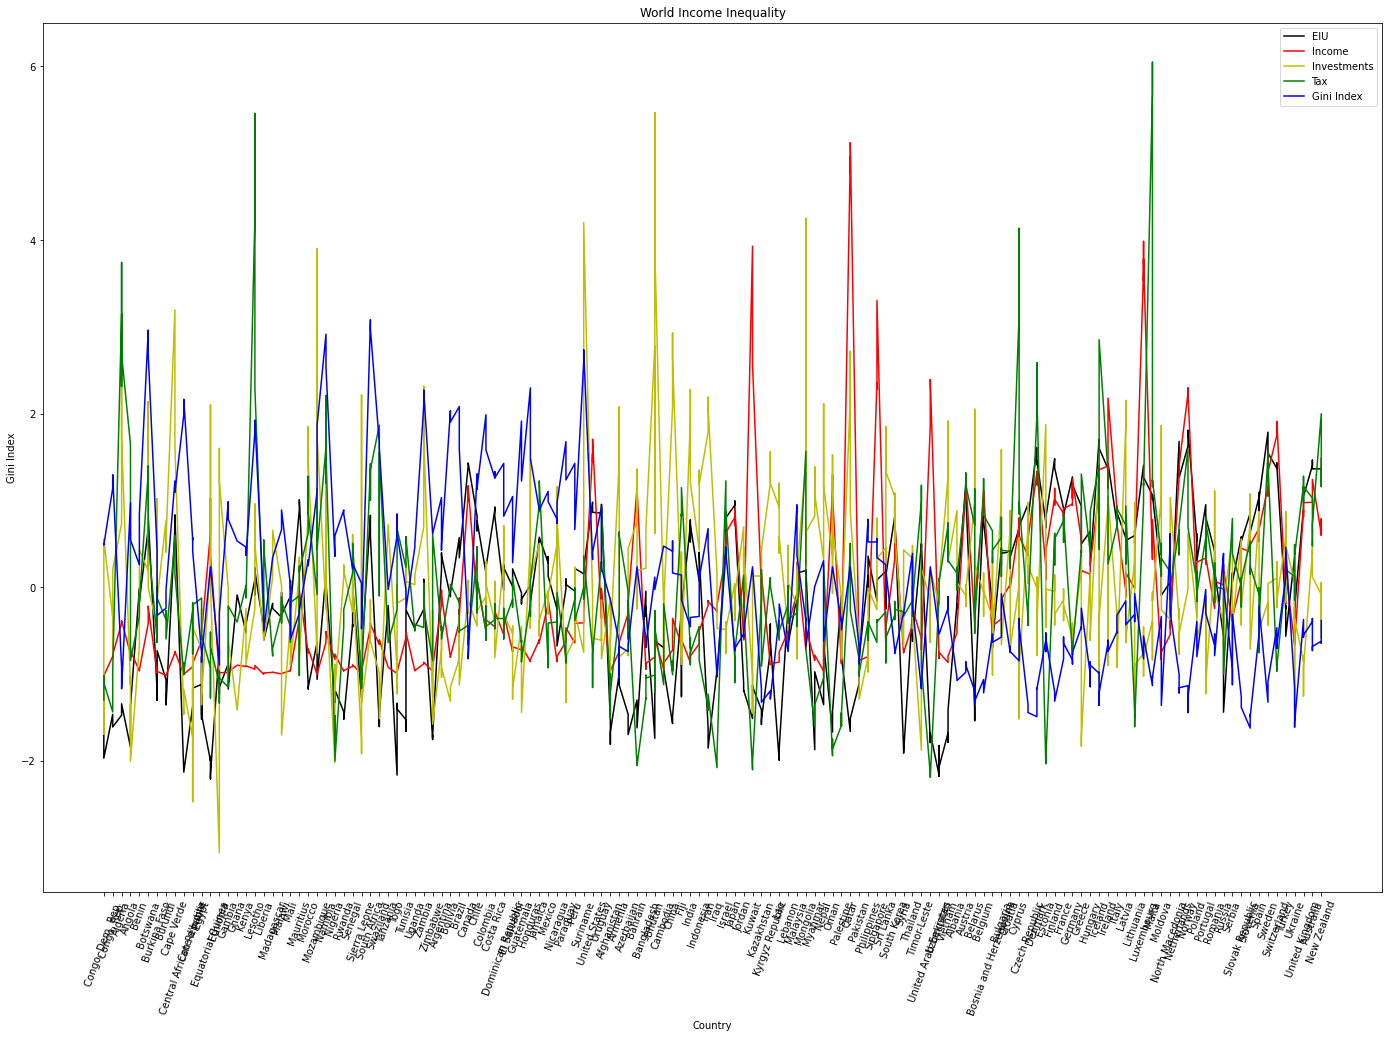

In [20]:
#Ascending by year
#data_year = data.sort_values(by = ['year'])

#Data gap is large, normalize the data before visualisation
#list(data['country']),fontdict={'size':10}

#Draw a line chart
fig = plt.figure(figsize=(24,16))
ax = fig.add_subplot(111)
ax.plot(data['country'],(data['EIU'] - data['EIU'].mean())/data['EIU'].std(),color='k',label='EIU')
ax.plot(data['country'],(data['Income'] - data['Income'].mean())/data['Income'].std(),color='r',label='Income')
ax.plot(data['country'],(data['Investments'] - data['Investments'].mean())/data['Investments'].std(),color='y',label='Investments')
ax.plot(data['country'],(data['Tax'] - data['Tax'].mean())/data['Tax'].std(),color='g',label='Tax')
ax.plot(data['country'],(data['Gini Index'] - data['Gini Index'].mean())/data['Gini Index'].std(),color='b',label='Gini Index')
plt.xticks(rotation=70)
plt.title("World Income Inequality")
ax.legend()
plt.xlabel('Country')
plt.ylabel("Gini Index")
# Save the line chart as World Income Inequality  
plt.savefig('World Income Inequality.png')
# Show the line chart of World Income Inequality
plt.show()

Choose the data from Asia and draw the line chart to see the differences with World Income Inequality.

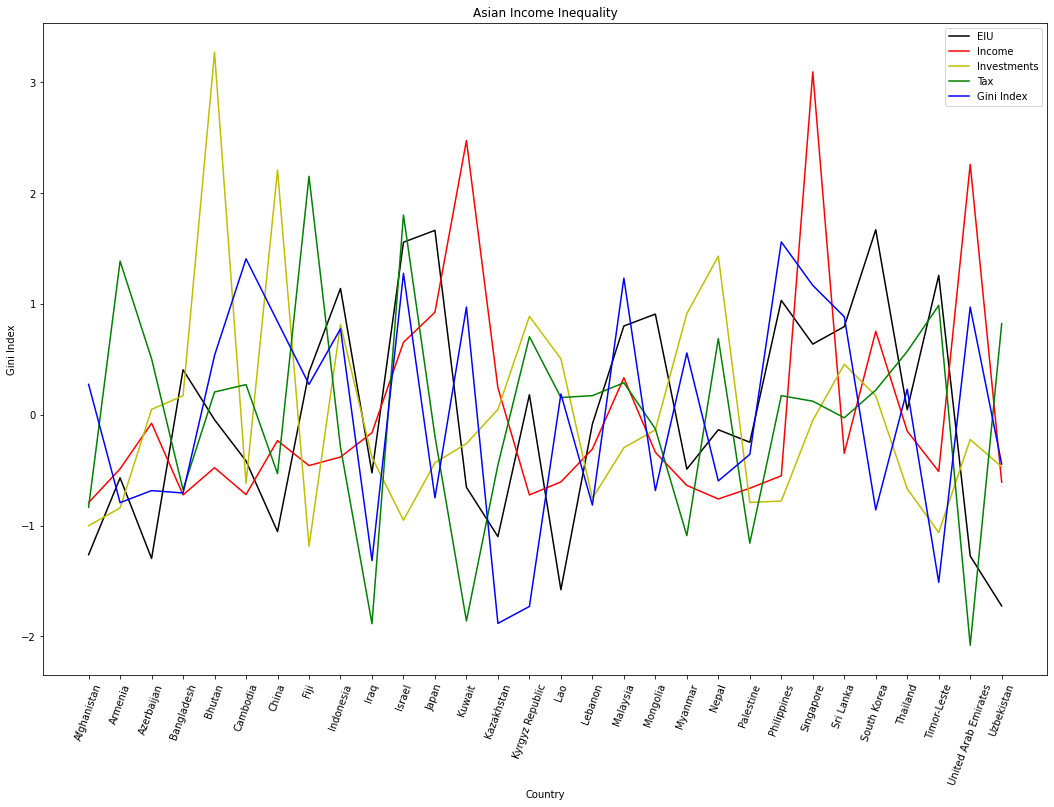

In [21]:
data_Asian = data_deal[data_deal["continent"].isin(["Asia"])]

#Ascending by year
#data_year = data.sort_values(by = ['year'])

#Data gap is large, normalize the data before visualisation
#list(data['country']),fontdict={'size':10}

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(data_Asian['country'],(data_Asian['EIU'] - data_Asian['EIU'].mean())/data_Asian['EIU'].std(),color='k',label='EIU')
ax.plot(data_Asian['country'],(data_Asian['Income'] - data_Asian['Income'].mean())/data_Asian['Income'].std(),color='r',label='Income')
ax.plot(data_Asian['country'],(data_Asian['Investments'] - data_Asian['Investments'].mean())/data_Asian['Investments'].std(),color='y',label='Investments')
ax.plot(data_Asian['country'],(data_Asian['Tax'] - data_Asian['Tax'].mean())/data_Asian['Tax'].std(),color='g',label='Tax')
ax.plot(data_Asian['country'],(data_Asian['Gini Index'] - data_Asian['Gini Index'].mean())/data_Asian['Gini Index'].std(),color='b',label='Gini Index')
plt.xticks(rotation=70)
plt.title("Asian Income Inequality")
ax.legend()
plt.xlabel('Country')
plt.ylabel("Gini Index")
# Save the line chart as Asian Income Inequality
plt.savefig('Asian Income Inequality.png')
# Show the line chart of World Income Inequality
plt.show()

The initial dataset is too big to do further research. We could divide them into separate datasets  depends on different research questions. This is only an example above.

Now we plot the distribution of the Gini Index on the world map.
(These codes are from Jordanka, M, could be found from [here](https://www.kaggle.com/jordankam/where-are-the-happiest-people-in-the-world).)

In [22]:
#Please find the .html of the world Gini Index map and look into it.
data_map = dict(type='choropleth',
           locations = data_deal['country'],
           locationmode = "country names",
           z = data_deal['Gini Index'],
           text = data_deal['country'],
           colorbar = {'title': 'World Income Inequality---Gini Index'})

layout = dict(title = '2015 Global Income Inequality',
             geo = dict(showframe = False,
                       projection = {'type':'stereographic'}))

choromap = go.Figure(data=[data_map], layout = layout)
plotly.offline.plot(choromap)

'temp-plot.html'

### 5.2 | Multiple linear regression analysis

Transpose，build list data and reconstruct linear correlation matrix.

In [23]:
#EIU	Income	Investments	Tax
data_cor = data_deal.iloc[:,3:-1]
data_cor_deal = list(zip(*data_cor.values))
#Calculate the correlation coefficient
data_cor_final = np.corrcoef(data_cor_deal)
data_cor

,EIU,Income,Investments,Tax
27,33.5,6650,9.55,12.5
46,78.7,15700,32.10,24.7
57,47.0,1600,24.30,15.1
80,33.1,3230,20.10,15.4
91,31.8,10200,14.30,12.5
...,...,...,...,...
1188,51.2,23300,28.40,18.2
1199,57.0,7470,15.90,20.5
1210,83.1,39000,17.00,25.2
1221,90.1,44100,26.10,22.0


Use the correlation matrix to check the multicollinearity between variables.

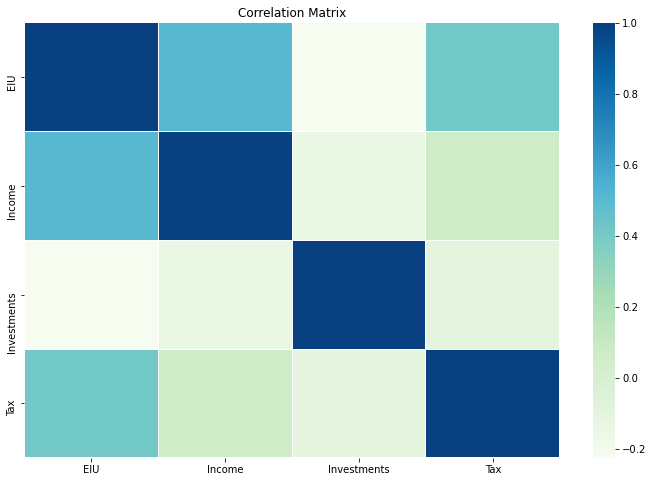

In [24]:
#Calculate the correlation coefficient
data_cor_final = np.corrcoef(data_cor_deal)
data_cor_df = pd.DataFrame(data_cor_final)
data_cor_df.index = list(data)[3:-1]
data_cor_df.columns = list(data)[3:-1]
fig2 = plt.figure(figsize=(12,8))
ax2 = fig2.add_subplot(111)
#Cmap for matplotlib colormap
sns.heatmap(data_cor_df, linewidths = 0.05, ax = ax2, cmap='GnBu')
ax2.set_title('Correlation Matrix')
plt.savefig('Correlation Matrix.png')
plt.show()

### **Stepwise Regression**

Stepwise Regression is a repetitive process, first we use the explained variable to do a simple regression on each considered explanatory variable, and then based on the regression equation corresponding to select the explanatory variable with the largest contribution from the explanatory variable, the remaining explanatory variables are gradually introduced. After gradually returning in this way, the explanatory variables that remain in the model are important without serious multicollinearity.


In [25]:
# Define the function of taking the specified column from the input data set as the training set and the test set (from taking 4 columns to taking 8 columns)
def xattrSelect(x, idxSet):
    xOut = []
    for row in x:
        xOut.append([row[i] for i in idxSet])
    return(xOut)

xList = [] # Construct a list for storing attribute sets
labels = [float(label) for label in data.iloc[:,-1].tolist()] # Extract the tag set in data and put it into the list
names = list(data)[3:] # Extract the names of all attributes in data and put them into the list
for i in range(len(data)):
    xList.append(data.iloc[i,3:-1]) # Each element in the xList corresponds to each row in the data except the label column
    
# Divide the original data set into training set (2/3) and test set (1/3):

indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]
attributeList = [] # Construct a list for storing attribute indexes
index = range(len(xList[1])) # Index is used in the outer for loop in the following code
indexSet = set(index) # Construct an index set composed of indexes corresponding to all attributes in names
oosError = [] # Constructed to store the smallest RMSE after each end of the inner for loop in the following code
for i in index:
    attSet = set(attributeList)
attTrySet = indexSet - attSet # Construct a collection of attribute indexes not in attributeList
attTry = [ii for ii in attTrySet] # Construct a list of attribute indexes in attTrySet
errorList = []
attTemp = []
for iTry in attTry:
    attTemp = [] + attributeList
    attTemp.append(iTry)

# Call the attrSelect function to select the specified columns from xListTrain and xListTest to form a temporary training set and test set
xTrainTemp = xattrSelect(xListTrain, attTemp)
xTestTemp = xattrSelect(xListTest, attTemp)

# Convert the training set and test set that need to be used into array objects
xTrain = np.array(xTrainTemp)
yTrain = np.array(labelsTrain)
xTest = np.array(xTestTemp)
yTest = np.array(labelsTest)

# Use scikit package to train linear regression model
wineQModel = linear_model.LinearRegression()
wineQModel.fit(xTrain,yTrain)

# Calculate the RMSE on the test set
rmsError = np.linalg.norm((yTest-wineQModel.predict(xTest)), 2)/sqrt(len(yTest)) # Calculate RMSE using the 2 norm of the vector
errorList.append(rmsError)
attTemp = []
iBest = np.argmin(errorList) # Select the new index corresponding to the smallest value in errorList
attributeList.append(attTry[iBest]) # Use the new index iBest to add the corresponding attribute index in attTry to attributeList
oosError.append(errorList[iBest]) # Add the minimum value in errorList to the oosError list

print("Out of sample error versus attribute set size" )
print(oosError)
print("\n" + "Best attribute indices")
print(attributeList)
namesList = [names[i] for i in attributeList]
print("\n" + "Best attribute names")
print(namesList)

Out of sample error versus attribute set size
[8.377869085580253]

Best attribute indices
[0]

Best attribute names
['EIU']


According to the results, we could see that Stepwise Regression has choosen **EIU Democracy Index** as the best attribute.

### **Variance Inflation Factors (VIF)** 
<br>**Use statsmodels to directly build multiple linear models**
<br>The reason of why using statsmodels to build a multiple linear models here is for multicollinearity problems. Multicollinearity will create the regression model which is well constructed mathematically, but it does not conform to actual reality.Here we could make better comprehension of the relationship among variables. It could also be a reference value after vif culling attributes.

In [26]:
#Use statsmodels to directly build multiple linear models

y_three = data[list(data)[-1]] #Dependent variable data
X_three = data.iloc[:, 3:-1] #Independent variable data
X_three = sm.add_constant(X_three) #Add a column of constant 1, which is the constant term in the regression model
reg = sm.OLS(y_three, X_three) #Generate regression model
model = reg.fit() #Fit data
model.summary() #Generate results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gini Index   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     38.33
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           2.91e-30
Time:                        12:46:40   Log-Likelihood:                -4302.9
No. Observations:                1234   AIC:                             8616.
Df Residuals:                    1229   BIC:                             8641.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          42.4227      1.078     39.366      0.000      40.308      44.537
EIU            -0.0334      0.013     -2.499      0.013      -0.060      -0.007
Income         -0.0001    1.3e-05     -9.670      0.000      -0.000      -0.000
Investments     0.0005      0.029      0.017      0.986      -0.056       0.057
Tax             0.0158      0.032      0.488      0.626      -0.048       0.079
==============================================================================
Omnibus:                      126.708   Durbin-Watson:                   0.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.343
Skew:                           0.853   Prob(JB):                     1.25e-36
Kurtosis:                       3.553   Cond. No.                     1.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Through the regression results we could find that the **r-square** is 0.111, **Prob (F-statistic)**< 0.05, which means they have a weak correlation. The **p-value** of EIU and Income is less than 0.05 which shows that the relationship among Gini Index and those two independent variables are significant.

**Variance Inflation Factors (VIF)**

R square is based on the fact that when Gini Intex is the dependent variable coefficient of multiple determination for variable regression. The larger the VIF, the higher the relationship between this variable and other variables, and the more serious the multicollinearity. If the VIF with the largest variable exceeds 10, delete the variable with the largest VIF.

In [27]:
#Calculate VIF and eliminate the result of multicollinearity

def process(data, col):
    data = data.loc[:, col] #Read the corresponding column label data
    vif = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])][1:]
    if max(vif) >= 10:
        index = np.argmax(vif)+1 #Get the label of the maximum value
        del col[index] #Delete the item with the largest vif value
        return process(data, col) #Recursive process
    else:
        vif = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])][1:]
        return col, vif
    
cols = ['const', 'EIU', 'Income', 'Investments', 'Tax']
cols, vif = process(X_three, cols)
reg = sm.OLS(y_three, X_three[cols])
print("vif")
print(vif)
model = reg.fit()
model.summary()

vif
[1.485400011643034, 1.251988166596443, 1.0176512362316863, 1.1949016196866444]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gini Index   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     38.33
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           2.91e-30
Time:                        12:46:40   Log-Likelihood:                -4302.9
No. Observations:                1234   AIC:                             8616.
Df Residuals:                    1229   BIC:                             8641.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          42.4227      1.078     39.366      0.000      40.308      44.537
EIU            -0.0334      0.013     -2.499      0.013      -0.060      -0.007
Income         -0.0001    1.3e-05     -9.670      0.000      -0.000      -0.000
Investments     0.0005      0.029      0.017      0.986      -0.056       0.057
Tax             0.0158      0.032      0.488      0.626      -0.048       0.079
==============================================================================
Omnibus:                      126.708   Durbin-Watson:                   0.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.343
Skew:                           0.853   Prob(JB):                     1.25e-36
Kurtosis:                       3.553   Cond. No.                     1.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The VIF value of four independent variables are all less than 10, which means there is no serious collinearity
problem, no variables need to be eliminated. There are no differences in the regression results compared with the multiple linear regression built by statsmodels above.

### **Sklearn Linear Regression**

After eliminating collinearity, construct a sklearn linear regression model, using variables selected from VIF, and do sklearn linear regression without removing any of the four variables. 

In [28]:
#Use sklearn's LinearRegression for training, training set: test set=7:3
X = data.iloc[:,3:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=532)#Choose 30% as the test set

def test_LinearRegrssion(X_train, X_test, y_train, y_test):
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)#Use training samples for magic training
    print('Coefficients:%s,intercept %.2f' % (regr.coef_, regr.intercept_))
    print("Residual sum of square:%.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))#Mean square error
    print('Score:%.2f' % regr.score(X_test, y_test))#Score. The closer the value is to 1, the better the effect. It can also be a negative number. In the case of poor training effect
test_LinearRegrssion(X_train, X_test, y_train, y_test)

Coefficients:[-0.02743302 -0.00013651 -0.01107927 -0.00088193],intercept 42.93
Residual sum of square:64.18
Score:0.08


Do the Linear Regression between Gini and EIU base on this. As EIU is selected by Stepwise Regression as the best attribute.

In [29]:
#Linear Regression between Gini and EIU
test_LinearRegrssion(X_train.iloc[:,0:1], X_test.iloc[:,0:1], y_train, y_test)

Coefficients:[-0.08625494],intercept 43.51
Residual sum of square:67.43
Score:0.03


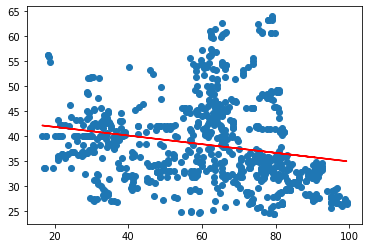

In [30]:
fig3 = plt.figure()         
ax3 = fig3.add_subplot(1,1,1)
plt.scatter(X_train.iloc[:,0:1],y_train)
plt.plot(X_train.iloc[:,0:1],-0.08625494*X_train.iloc[:,0:1]+43.51,color='r')
 
plt.savefig('EIU.png')

plt.show()

### **Regression Models: Lasso**

To improve the prediction accuracy and interpretability of the regression model, we can use Lasso to select variables and perform regularized regression methods.

**Lasso**

In [31]:
# Divide the data into training set and test set
X_Five_train, X_Five_test, y_Five_train, y_Five_test = train_test_split(X, y,
test_size=0.3, random_state=532)#Choose 30% as the test set

In [32]:
# Lasso Rgression Model
def test_Lasso(X_Five_train,X_Five_test,y_Five_train,y_Five_test):
    regr=linear_model.Lasso()
    regr.fit(X_Five_train,y_Five_train)
    print('Coefficients:%s,intercept %.5f' % (regr.coef_, regr.intercept_))
    print("Residual sum of square:%.2f" % np.mean((regr.predict(X_Five_test) -
y_Five_test) ** 2))
    print('Score:%.2f' % regr.score(X_Five_test,y_Five_test))
    
test_Lasso(X_Five_train,X_Five_test,y_Five_train,y_Five_test)

Coefficients:[-0.02403899 -0.00013806 -0.         -0.        ],intercept 42.46391
Residual sum of square:64.16
Score:0.08


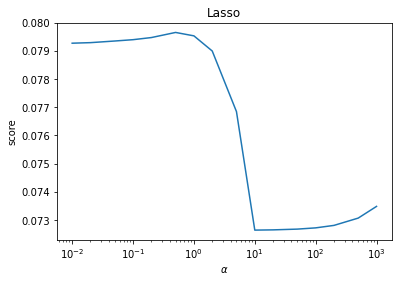

In [33]:
#Different alpha values have different effects on prediction performance, specify the detection code
def test_Lasso_alpha(X_Five_train,X_Five_test,y_Five_train,y_Five_test):
    alphas=[0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000]#alpha list
    scores=[]#Predictive performance
    for each in alphas:
        regr = linear_model.Lasso(alpha=each)
        regr.fit(X_Five_train,y_Five_train)
        score=regr.score(X_Five_test,y_Five_test)
        scores.append(score)
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Lasso")
    plt.show()

test_Lasso_alpha(X_Five_train,X_Five_test,y_Five_train,y_Five_test)

Since our Lasso model score are almost 0, it means that the Lasso model does not do well in fitting the
relationship between the independent and dependent variables. Moreover, the plot of Lasso
Path is not very good.

<a id="ID_results"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Questions](#ID_questions) | [4.0 Methodology](#ID_methodology) | [5.0 Data](#ID_data) | [6.0 Results and Discussion](#ID_results) | [7.0 Conclusion](#ID_conclude) | [Bibliography](#ID_biblio) | [Appendix](#ID_append) |

## 6.0 | Results and Discussion

**Results**

This paper has done the linear regression between the dependent variable and independent variables with the aim of answering the following research questions with each addressed below:
<br>

**RQ1**| Is there any relationship among the Gini index, EIU Democracy Index, Income, Investments and Tax?

**RQ2**|  Which attribute has a greater impact on income inequality?
<br>**Answers**

**RQ1**: There is weak negative correlation between the Gini index and EIU, weak negative correlation between Gini index and Income.

**RQ2**: EIU Democracy Index has the greatest impact on Gini Index.

**Discussion**

We compare the multiple linear regression results obtained by the two methods and we get different answers. Although the methodology flow in this paper is comprehensive and logical, there still have some limitations.

First, the R Square value of the linear regression model we made in VIF is only 0.111, but according to the idea of stepwise regression, neither
Significant explanatory variables are selected into the regression equation, and no insignificant explanatory variables are excluded from the regression equation; so this may be the reason why there is only one best variable (EIU), but VIF does not eliminate the other three. After all, the selection criteria are different, so it is not the best idea to delete variables to solve the collinearity problem through stepwise regression.

Secondly, the results of the linear regression in this paper is not good. We need to explore more independent variables related to Income Inequality to do further analysis.

<a id="ID_conclude"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Questions](#ID_questions) | [4.0 Methodology](#ID_methodology) | [5.0 Data](#ID_data) | [6.0 Results and Discussion](#ID_results) | [7.0 Conclusion](#ID_conclude) | [Bibliography](#ID_biblio) | [Appendix](#ID_append) |

## 7.0 | Conclusion

This analysis indicates that EIU Democracy Index has the most significant impact on Income Inequality, while Tax has the least impact on it. Taking the VIF as an example, when the other variables remain unchanged, the EIU Democracy Index and Income decrease, the Gini Index will increase. According to the analysis in this paper, more independent variables which may have impacts on Income Inequality should be explored. Researchers should keep concentrating on the problem of Income Inequality, governments should make some useful political decisions on it.

In [34]:
end_time = time.time()
run_time = end_time - start_time
print("Total run time: ", run_time, "seconds")

Total run time:  5.186349153518677 seconds


**Word Count : 2120 words**

<a id="ID_biblio"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Questions](#ID_questions) | [4.0 Methodology](#ID_methodology) | [5.0 Data](#ID_data) | [6.0 Results and Discussion](#ID_results) | [7.0 Conclusion](#ID_conclude) | [Bibliography](#ID_biblio) | [Appendix](#ID_append) |

## Bibliography

_https://docs.google.com/spreadsheets/d/1d0noZrwAWxNBTDSfDgG06_aLGWUz4R6fgDhRaUZbDzE/edit#gid=935776888.
<br> https://www.gapminder.org/data/documentation/gd001/.
<br> https://data.worldbank.org/indicator/GC.TAX.TOTL.GD.ZS.
<br> Current Population Survey (CPS) – Definitions and Explanations. US Census Bureau.
<br> AIYAR, S. & EBEKE, C. 2020. Inequality of opportunity, inequality of income and economic growth. World Development, 136, 105115.
<br> CHU, L. K. & HOANG, D. P. 2020. How does economic complexity influence income inequality? New evidence from international data. Economic Analysis and Policy, 68, 44-57.
<br> GINI, C. 1936. On the Measure of Concentration with Special Reference to Income and Statistics. Colorado College Publication.
<br> HAN, M. & PYUN, J. H. 2020. Markups and income inequality: Causal links, 1975-2011. Journal of Comparative Economics._



<a id="ID_append"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Questions](#ID_questions) | [4.0 Methodology](#ID_methodology) | [5.0 Data](#ID_data) | [6.0 Results and Discussion](#ID_results) | [7.0 Conclusion](#ID_conclude) | [Bibliography](#ID_biblio) | [Appendix](#ID_append) |

## Appendix

Link to the original raw data can be found [here](https://www.kaggle.com/psterk/income-inequality).